# Introduction

Goal: Segment customers based on demographic and behavioral attributes using K-Means clustering. This helps in targeted marketing strategies.  
Dataset: Mall Customers.csv  
Columns: CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load Dataset

In [2]:
df = pd.read_csv("Mall Customers.csv")
print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


# Data Preprocessing

Remove CustomerID as it's not useful for clustering

In [3]:
if 'CustomerID' in df.columns:
    df.drop('CustomerID', axis=1, inplace=True)

Handle missing values (if any)

In [4]:
for col in df.select_dtypes(include='number'):
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(exclude='number'):
    df[col].fillna(df[col].mode()[0], inplace=True)

Convert categorical Gender to Numeric

In [5]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Exploratory Data Analysis (EDA)

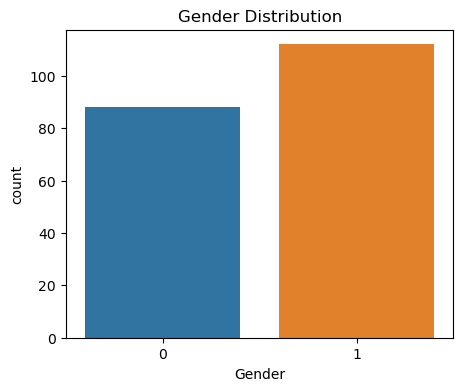

In [6]:
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

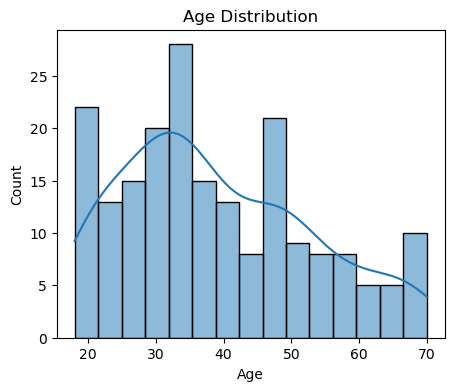

In [7]:
plt.figure(figsize=(5,4))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution")
plt.show()

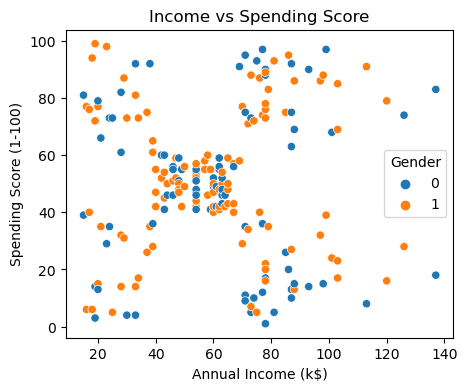

In [10]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title("Income vs Spending Score")
plt.show()

# Feature Scaling

In [11]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Find Optimal k (Elbow + Silhouette)

In [12]:
inertias, silhouettes, K_range = [], [], range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

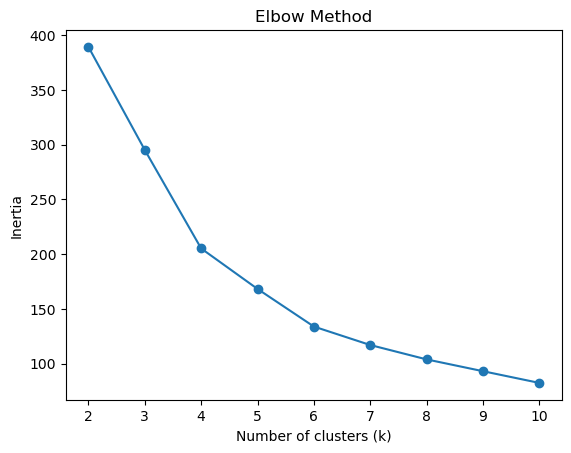

In [13]:
plt.figure()
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

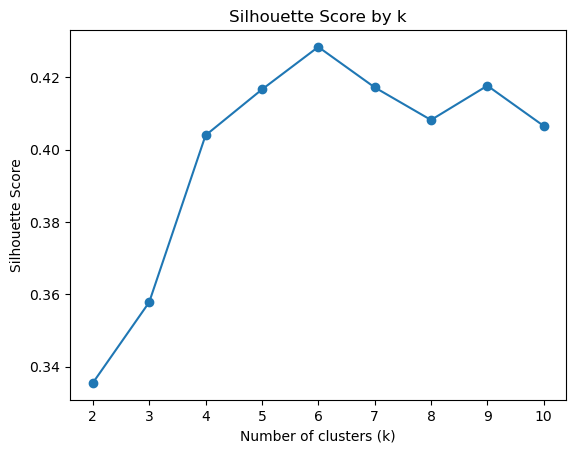

In [14]:
plt.figure()
plt.plot(K_range, silhouettes, marker='o')
plt.title("Silhouette Score by k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Fit K-Means with chosen k (based on Silhouette)

In [15]:
best_k = int(pd.Series(silhouettes, index=K_range).idxmax())
print("Chosen k:", best_k)

kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

Chosen k: 6


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# PCA for visualization

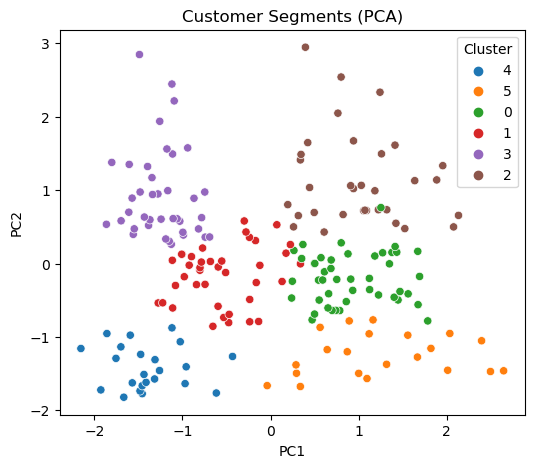

In [16]:
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(X_scaled)
viz_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
viz_df['Cluster'] = df['Cluster'].astype(str)

plt.figure(figsize=(6,5))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=viz_df, palette='tab10')
plt.title("Customer Segments (PCA)")
plt.show()

# Cluster Profiling


Cluster Profiles:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        26.794872           57.102564               48.128205
2        41.939394           88.939394               16.969697
3        32.692308           86.538462               82.128205
4        25.000000           25.260870               77.608696
5        45.523810           26.285714               19.380952


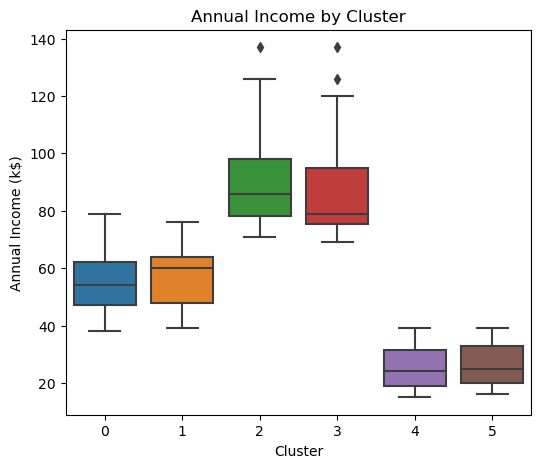

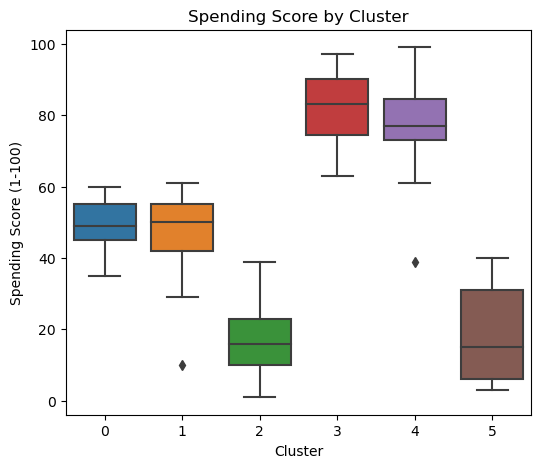

In [17]:
profile = df.groupby('Cluster')[features].mean()
print("\nCluster Profiles:\n", profile)

plt.figure(figsize=(6,5))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title("Annual Income by Cluster")
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.title("Spending Score by Cluster")
plt.show()

# Conclusion

We segmented customers into distinct groups using K-Means clustering.
These profiles can help in designing targeted marketing strategies 
for high-value, budget-conscious, or low-engagement customers.